In [157]:
#Importing the necessary libraries
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [112]:
#loading the dataset
df = pd.read_csv('Salary_Data.csv')

In [126]:
#Previewing the dataset
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0


In [127]:
#Summary Statistics of all the variables
df.describe(include = 'all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy
count,6698.000000,6698,6698,6698,6698.000000,6698.000000,6698,6698.000000
unique,NaN,3,5,191,NaN,NaN,4,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,Bachelor's Degree,NaN
freq,NaN,3671,3021,518,NaN,NaN,3021,NaN
mean,33.623022,NaN,NaN,NaN,8.095178,115329.253061,NaN,0.204389
std,7.615784,NaN,NaN,NaN,6.060291,52789.792507,NaN,0.403285
min,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,0.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,0.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,0.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,0.000000


In [128]:
#Dropping all missing values from Dataset
df = df.dropna()

In [129]:
#Scatterplot of all the quantitative variables against each other

import plotly.express as px
fig = px.scatter_matrix(df[['Salary','Age', 'Years of Experience']])
fig.show()

#The variables show a positive correlation amongst each other

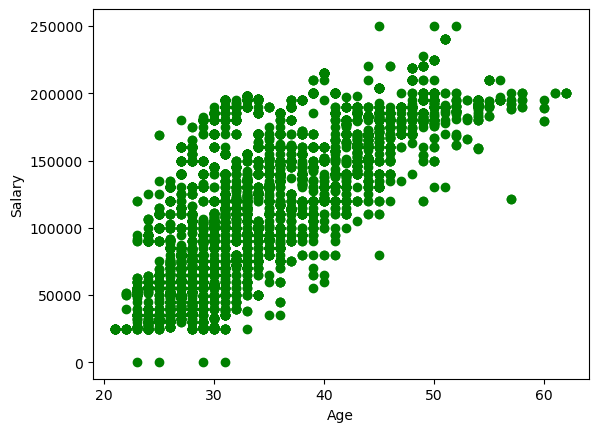

In [130]:
#Closer look of Age vs Salary correlation

plt.scatter(df['Age'],df['Salary'], color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
    

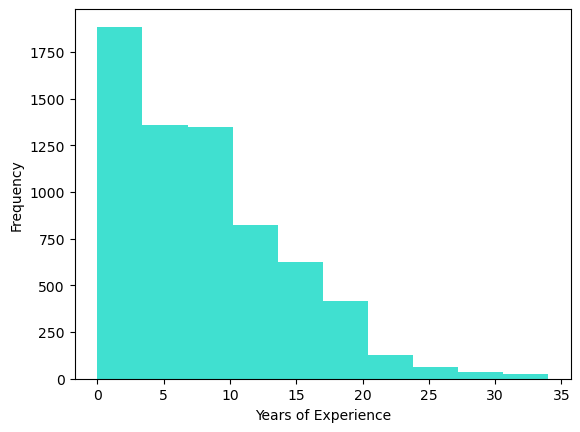

In [131]:
#Histogram of Years of Experience

plt.hist(df[['Years of Experience']], color = 'turquoise')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

#Most of the data includes people from zero to ten years of experience

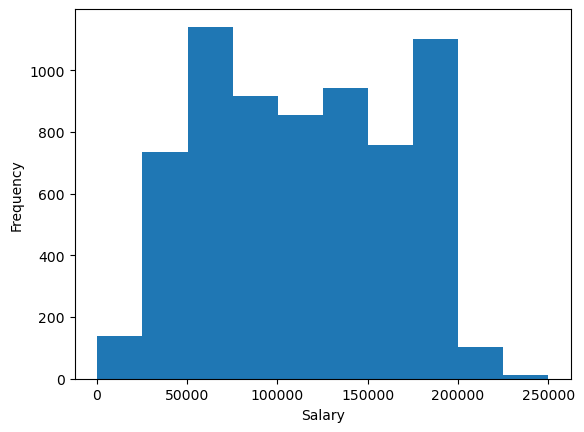

In [132]:
#Histogram of Salary

plt.hist(df[['Salary']])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [133]:
# Grouping the data by education level. Some of the data has discrepancies (ex: PhD & phD should be grouped together)
a = df.groupby(['Education Level']).count()
a

,Age,Gender,Job Title,Years of Experience,Salary,Education,PhD dummy
Education Level,,,,,,,
Bachelor's Degree,3021,3021,3021,3021,3021,3021,3021
High School,448,448,448,448,448,448,448
Master's Degree,1860,1860,1860,1860,1860,1860,1860
PhD,1368,1368,1368,1368,1368,1368,1368
phD,1,1,1,1,1,1,1


In [134]:
#Creating the column Education to correct the entry discrepancies.

df['Education'] = df['Education Level'].replace("Bachelor's", "Bachelor's Degree", inplace = True)
df['Education'] = df['Education Level'].replace("Master's", "Master's Degree", inplace = True)
df['Education']  = df['Education Level'].replace("phD", "PhD", inplace = False)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,PhD,1
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,High School,0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Bachelor's Degree,0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Master's Degree,0


In [135]:
#Grouping the data by education again to check.

a = df.groupby(['Education']).count()['Age']

a

Education
Bachelor's Degree    3021
High School           448
Master's Degree      1860
PhD                  1369
Name: Age, dtype: int64

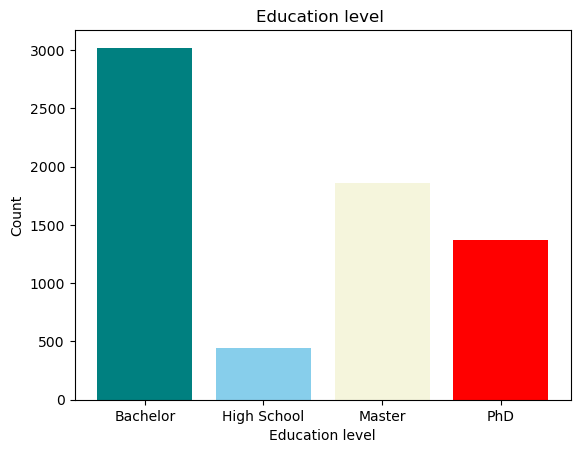

In [136]:
#Bar plot of all education levels
labels = ['Bachelor', 'High School', 'Master', 'PhD']

fig, ax = plt.subplots()
ax.bar(range(len(a)),a, label= labels, color = [ "teal", "skyblue", "beige", 'red'])

plt.xlabel("Education level")
plt.ylabel("Count")
plt.title("Education level ")
plt.xticks(range(len(a)), labels)

plt.show()


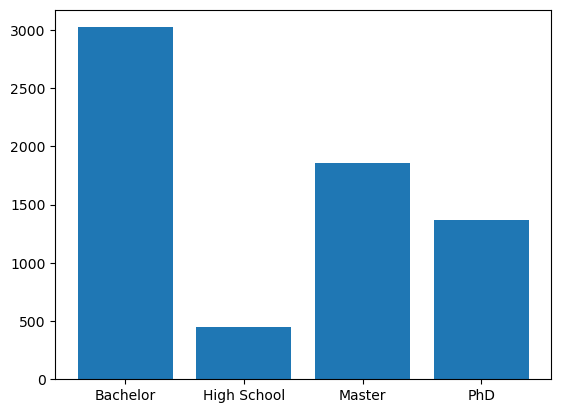

In [137]:
labels = ['Bachelor', "High School", "Master", "PhD"]
plt.bar(range(len(a)), a, label = labels)

plt.xticks(range(len(a)),labels)

plt.show()

In [ ]:
#The next step is to conduct a linear regression to find out if all the variables affect the salary. 
#First, the categorical variables (except Job Title) are changed to dummy variables

In [138]:
#Changing Gender to a dummy variable
df['G dummy']= df['Gender'].where(df['Gender'] != "Female", 0.0) 
df['G dummy'].replace('Male', 1.0, inplace = True) 
df['G dummy'].replace('Other', 0.0, inplace = True) 
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy,G dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0,1.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0,0.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1,1.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0,0.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0,1.0
...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,PhD,1,0.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,High School,0,1.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Bachelor's Degree,0,0.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Master's Degree,0,1.0


In [139]:
#Changing Bachelor to a dummy variable
df['B dummy']= df['Education'].where(df['Education'] != "Bachelor's Degree", 1) 
df['B dummy'].replace("Master's Degree", 0, inplace = True)
df['B dummy'].replace("PhD", 0, inplace = True)
df['B dummy'].replace("High School", 0, inplace = True)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy,G dummy,B dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0,1.0,1
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0,0.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1,1.0,0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0,0.0,1
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,PhD,1,0.0,0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,High School,0,1.0,0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Bachelor's Degree,0,0.0,1
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Master's Degree,0,1.0,0


In [140]:
#Changing Masters to a dummy variable
df['M dummy'] = df['Education'].where(df['Education'] != "Master's Degree", 1) 
df['M dummy'].replace("Bachelor's Degree", 0, inplace = True)
df['M dummy'].replace("PhD", 0, inplace = True)
df['M dummy'].replace("High School", 0, inplace = True)

df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy,G dummy,B dummy,M dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0,1.0,1,0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0,0.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1,1.0,0,0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0,0.0,1,0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0,1.0,0,1
5,29.0,Male,Bachelor's Degree,Marketing Analyst,2.0,55000.0,Bachelor's Degree,0,1.0,1,0
6,42.0,Female,Master's Degree,Product Manager,12.0,120000.0,Master's Degree,0,0.0,0,1
7,31.0,Male,Bachelor's Degree,Sales Manager,4.0,80000.0,Bachelor's Degree,0,1.0,1,0
8,26.0,Female,Bachelor's Degree,Marketing Coordinator,1.0,45000.0,Bachelor's Degree,0,0.0,1,0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,PhD,1,1.0,0,0


In [153]:
#Changing High School to a dummy variable

df['HS dummy'] = df['Education'].where(df['Education'] != "High School", 1) 
df['HS dummy'].replace("Bachelor's Degree", 0, inplace = True)
df['HS dummy'].replace("PhD", 0, inplace = True)
df['HS dummy'].replace("Master's Degree", 0, inplace = True)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy,G dummy,B dummy,M dummy,HS dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0,1.0,1,0,0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0,0.0,0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1,1.0,0,0,0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0,0.0,1,0,0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,PhD,1,0.0,0,0,0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,High School,0,1.0,0,0,1
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Bachelor's Degree,0,0.0,1,0,0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Master's Degree,0,1.0,0,1,0


In [142]:
#Changing PhD to a dummy variable

df['PhD dummy'] = df['Education'].where(df['Education'] != "PhD", 1) 
df['PhD dummy'].replace("Bachelor's Degree", 0, inplace = True)
df['PhD dummy'].replace("High School", 0, inplace = True)
df['PhD dummy'].replace("Master's Degree", 0, inplace = True)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,PhD dummy,G dummy,B dummy,M dummy,HS dummy
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,Bachelor's Degree,0,1.0,1,0,0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,Master's Degree,0,0.0,0,1,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,PhD,1,1.0,0,0,0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,Bachelor's Degree,0,0.0,1,0,0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,Master's Degree,0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,PhD,1,0.0,0,0,0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,High School,0,1.0,0,0,1
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Bachelor's Degree,0,0.0,1,0,0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Master's Degree,0,1.0,0,1,0


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2829.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:14:38   Log-Likelihood:                -78108.
No. Observations:                6698   AIC:                         1.562e+05
Df Residuals:                    6691   BIC:                         1.563e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.666e+04   2

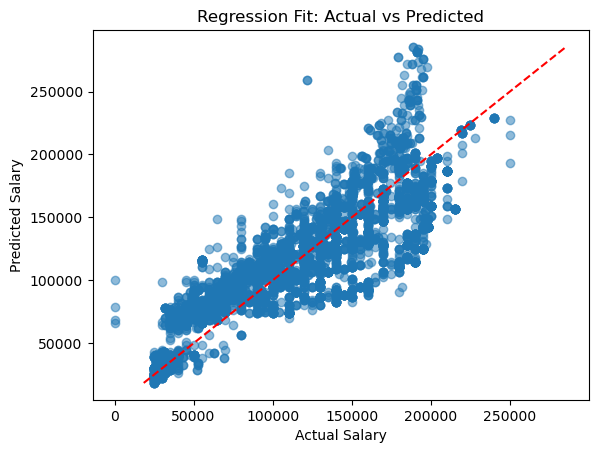

In [162]:
#Regression

X = df[['Age', 'Years of Experience', 'G dummy','B dummy','M dummy','HS dummy','PhD dummy']]
y = df['Salary']
x = sm.add_constant(X) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)
mse_linear_regression = round(mean_squared_error(y, predictions), 2)
rmse_linear_regression = round(mse_linear_regression**.5, 2)
R2_linear = round(r2_score(y, predictions), 2)
print("Mean Squared Error = ",mse_linear_regression)
print("Root Mean Squared Error = ", rmse_linear_regression)
print("R-Squared = ",R2_linear)
#The regression indicates that all variables are statistically significant to the salary.


#The following shows a scatterplot of Actual salary vs predicted salary based on our model.
#The line of best fit is also included.

plt.scatter(x=df['Salary'], y=predictions, alpha=0.5)
plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()